## This tutorial is to teach you how to make fast and elegant visualisations for your dataset using matplotlib and seaborn

Author:Nerdy2mato

Date: 2019-04-07

### 0.Import packages & get data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # for plotting
import matplotlib.style
import matplotlib as mpl  # to customise all the components in the graph, including font, size, markers, lines, labels etc
import matplotlib.gridspec as gridspec  # to make sure suptitle is not overlapping with title

import seaborn as sns 

%matplotlib inline

In [2]:
# test datasample (you can use your own dataset)

tips = sns.load_dataset("tips")  # get some sample data
print(tips.head(10))
print(tips.dtypes)

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2
total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


### 1. Make a graph using seaborn default settings

The graph with default settings is hard to visualise

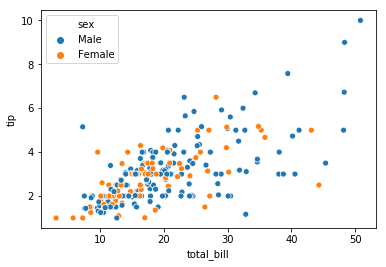

In [3]:
sns.scatterplot(x = 'total_bill',y = 'tip',hue = 'sex', data = tips)
plt.show()

### 2. Make a graph using seaborn customised settings

We can adjust matplotlib settings to make a better visualisation

#### Step 1: Pick a style you like

Matplotlib comes with quite a few style sheets: https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html

In [6]:
mpl.style.use('fivethirtyeight')  # choose a preferred style
print(plt.style.available) # see what styles are available

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


#### Step 2: every component can be customised including figure size, font size, number of axes, line width and marker size etc
matplotlib style config file (with default settings): https://matplotlib.org/users/customizing.html

In [7]:
'''re-config a few components for the graph'''

# mpl.rcParams['figure.figsize'] = [20, 10]  # only use it when you want all the graphs to be the same figure size
mpl.rcParams['figure.dpi'] = 80
# mpl.rcParams['savefig.dpi'] = 50

mpl.rcParams['font.size'] = 10  # customise font size of a particular graph title, x-axis ticker and y-axis ticker
mpl.rcParams['legend.fontsize'] = 10 # customise legend size
mpl.rcParams['figure.titlesize'] = 15 # customise the size of suptitle

#lines
mpl.rcParams['lines.markersize'] = 10
mpl.rcParams['legend.markerscale'] = 0.5
mpl.rcParams['lines.markeredgewidth']  : 4

#### Step 3: plot a graph and then customise its components

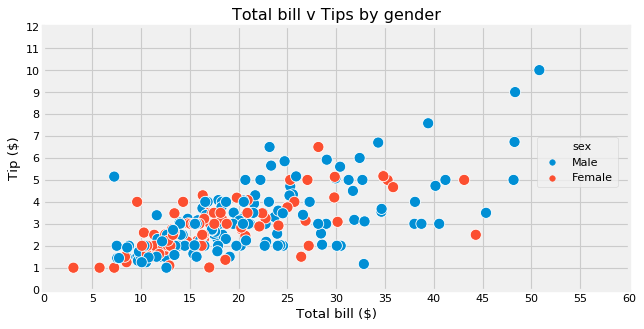

In [8]:
# create figure, define figure size, create an empty canvas (axes) and add tile to the graph
fig, ax = plt.subplots(figsize=[8,4],frameon = False)  # setup a single figure and define an empty axes
ax.get_title(loc = "center")
ax.set_title('Total bill v Tips by gender') # give a title to the graph
plt.tight_layout()  # avoid overlapping ticklabels, axis labels, and titles (can not control suptitle)


# same code as before to create a basic plot
sns.scatterplot(x = 'total_bill',y = 'tip',hue = 'sex', data = tips, ax = ax) 


# customise each component manually

ax.set_xlabel('Total bill ($)') # give a label name to the x axis
ax.set_ylabel('Tip ($)') # give a label name to the x axis

ax.set_xlim(0,60) # adjust x axis range for numeric input
ax.set_ylim(0,12)  # ajust y axis range for numeric input

ax.set_xticks(np.arange(0, 60 + 1, 5))  # adjust the x tick frequency
ax.set_yticks(np.arange(0, 12 + 1, 1))  # adjust the y tick frequency

ax.legend(bbox_to_anchor=(0.99, 0.6)) #customise the legend location

plt.show()

### 3. Make multiple plots

Now we know how the grammar works for matplotlib and seaborn. Let's apply the grammar we learned to make different plots

In [ ]:
# still using the same dataset
tips.head(4)

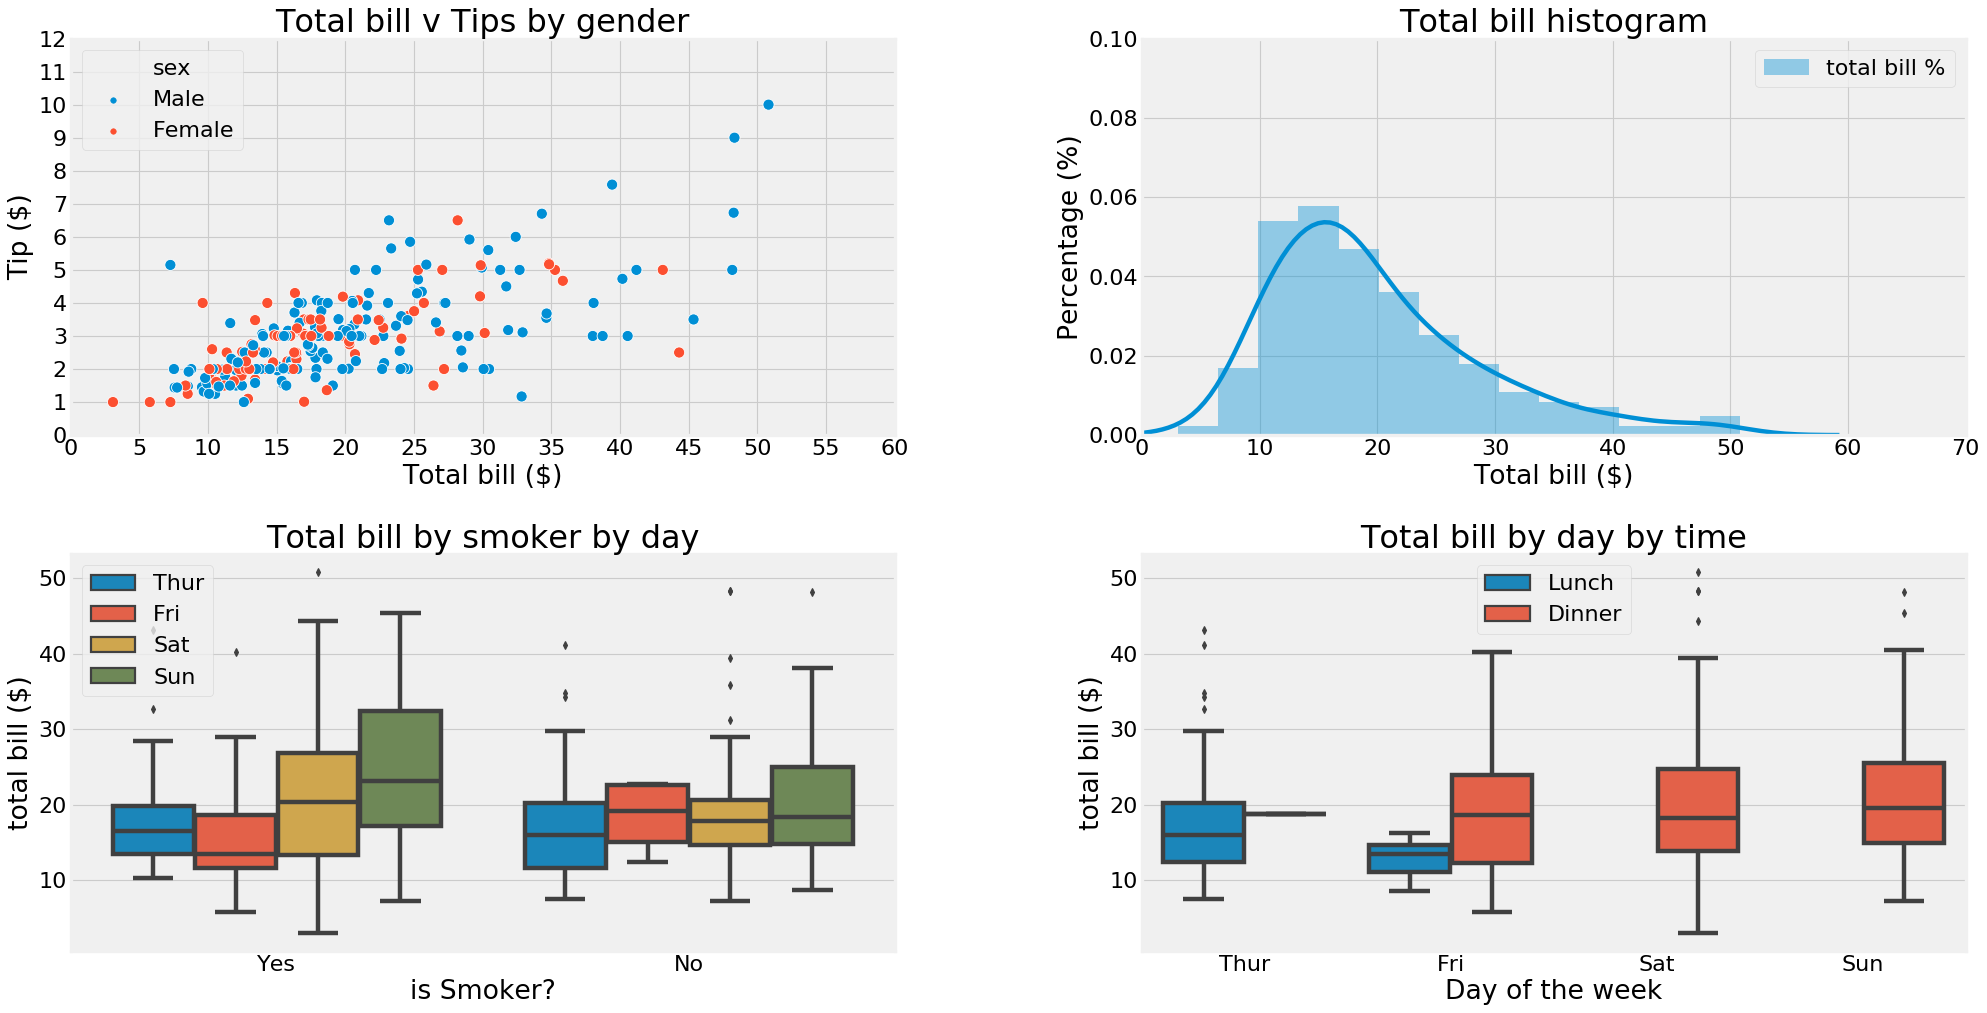

In [9]:
# Pick a style for your plot and choose your default fond size
mpl.style.use('fivethirtyeight') 
mpl.rcParams['font.size'] = 20  # customise font size of a particular graph title, x-axis ticker and y-axis ticker
mpl.rcParams['legend.fontsize'] = 20 # customise legend size


# create figure, define figure size, create an empty canvas (axes) and add tile to the graph
rows = 2
columns = 2
fig, axes = plt.subplots(rows,columns,figsize=[25,15],frameon = False)  # setup a figure and define 6 empty axes (2 rows and 3 columns)


# To adjust subplot positions and avoid overlapping on components and between subplots
plt.tight_layout()  # avoid overlapping ticklabels, axis labels, and titles (can not control suptitle)
plt.subplots_adjust(left=None, bottom=None, right=None, top= 0.8, wspace=0.3 , hspace=0.3)


# assign a name to each ax
d = {}
i = 0
for r in range(rows):
    for c in range(columns):
        d[i] = axes[r][c]
        i += 1

                
# plot a scatter plot
g0 = sns.scatterplot(x = 'total_bill',y = 'tip',hue = 'sex', data = tips, ax = d[0]) 
g0.set_title('Total bill v Tips by gender')
g0.set_xlabel('Total bill ($)') # give a label name to the x axis
g0.set_ylabel('Tip ($)') # give a label name to the x axis
g0.set_xlim(0,60) # adjust x axis range for numeric input
g0.set_ylim(0,12)  # ajust y axis range for numeric input
g0.set_xticks(np.arange(0, 60 + 1, 5))  # adjust the x tick frequency
g0.set_yticks(np.arange(0, 12 + 1, 1))  # adjust the y tick frequency
#g0.legend(bbox_to_anchor=(0.99, 0.6)) #customise the legend location


# plot a frequency plot
g1 = sns.distplot(tips['total_bill'], ax = d[1], label = 'total bill %')
g1.set_title('Total bill histogram')
g1.set_xlabel('Total bill ($)') # give a label name to the x axis
g1.set_ylabel('Percentage (%)') # give a label name to the x axis
g1.set_xlim(0,70) # adjust x axis range for numeric input
g1.set_ylim(0,0.1)  # ajust y axis range for numeric input
g1.legend()
#g1.legend(bbox_to_anchor=(0.99, 0.6))


# plot a box plot
g2 = sns.boxplot(x="smoker", y="total_bill", hue="day",data=tips, ax = d[2])


g2.set_title('Total bill by smoker by day')
g2.set_xlabel('is Smoker?') # give a label name to the x axis
g2.set_ylabel('total bill ($)') # give a label name to the x axis
g2.legend()
#g2.legend(bbox_to_anchor=(0.1, 0.6))



# plot another box plot
g3 = sns.boxplot(x="day", y="total_bill", hue="time",data=tips, ax = d[3])
g3.set_title('Total bill by day by time')
g3.set_xlabel('Day of the week') # give a label name to the x axis
g3.set_ylabel('total bill ($)') # give a label name to the x axis
g3.legend()
#g3.legend(bbox_to_anchor=(0.1, 0.6))


plt.show()